In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,classification_report,confusion_matrix

#### Realiza los siguientes pasos:

- Análisis descriptivo de los datos:
    - De las variables numéricas, halla datos estadísticos.
    - De las variables categóricas, lista las diferentes categorías y halla la frecuencia de cada una de ellas. 
    - Crea matriz de correlaciones existentes entre las variables numéricas del conjunto de datos, analiza los resultados. 
- Tratamiento de missing. Si existen valores faltantes, decide si eliminar los registros, llenarlos con valores como la media, la mediana o la moda y justifique tu respuesta. 
- Aplica árboles y random forest al problema de regresión.
- Compara, mediante las medidas que te parezcan adecuadas, la capacidad predictiva de ambos métodos. 
- Comenta las ventajas y desventajas de cada modelo. De acuerdo con los resultados, son realmente útiles los modelos creados para el conjunto de datos propuesto. 
- Para el ejercicio de clasificación, tanto para Árboles como para random forest, se crean los siguientes grupos: grupo1 SalePrice menor o igual a 100.000, grupo2 SalePrice entre 100.001 y 500.000 y grupo3 SalePrice mayor o igual a 500001. 
- Compara los resultados de los dos clasificadores y comenta los resultados. 
- Otros comentarios que consideres adecuados.


## Metodología


1. Análisis descriptivo de los datos: Se adjunta un archivo .txt con la descripción de cada una de las columnas
   - a)	Comenta de manera general qué se puede observar en la figura 1.

In [2]:
houses = pd.read_csv('housing_train.csv')

In [3]:
# Con esto puedo observar que hay 1460 filas y 81 columnas
houses.shape

(1460, 81)

In [4]:
# Ver las primeras 5 filas del DataFrame
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Con respecto a la figura 1 y según lo que me muestra datos.columns y la página del dataset en Kaggle,
# veo que no aparece listada la variable objetivo SalePrice en la figura 1.

# Además, tenemos variables de tipo numérico entero y punto flotante como MSSubClass, LotFrontage, LotArea y YrSold,
# entre otras, las cuales nos pueden ayudar en la regresión.

# Tenemos variables categóricas como MSZoning, Street, LotShape, Utilities y SaleCondition, entre otras, 
# que nos pueden ayudar en la clasificación.

# Hay variables que a simple vista parecen numéricas, como YeartBuilt y YearRemodAdd que en realidad son categóricas,
# ya que no se puede hacer ninguna operación aritmética con ellas.

# El comando datos.info() que ejecutaré en la siguiente celda nos puede dar más detalles sobre los tipos de datos

houses.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

- 1b)	En la figura 2 se pueden observar las estadísticas de las columnas numéricas. ¿Si se tienen 1460 observaciones, a qué conclusiones podríamos llegar con estos datos? ¿Podríamos eliminar algunas variables?

In [6]:
# Se puede observar que no todos las características tienen los 1460 datos completos como no nulos.
# Hay varios tipos de datos object que debemos verificar para transformar a una representación más cómoda para
# los algoritmos de aprendizaje automático que usaremos

# Se pueden ver caracteristicas como Alley, PoolQC, Fence, MiscFeature no llegan a tener en cantidad, suficientes de datos no nulos
# para ser considerados.

houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Ordenemos dichas variables en un ranking para verlas mejor
houses.isna().sum().sort_values(ascending=False).head(12)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
dtype: int64

In [8]:
# Vemos que tenemos variables con mínimo un 10% del total de 1460 datos nulos. Esto es un buen indicio para eliminar:

# 1. PoolQC
# 2. MiscFeature
# 3. Alley
# 4. Fence
# 5. FireplaceQu
# 6. LotFrontage

eliminar = ['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage']

In [9]:
# Continuando con el análisis, selecciono las columnas numéricas
# num = (houses.dtypes == float) | (houses.dtypes == int)
# num_cols = [c for c in num.index if num[c] == True]

# DataFrame con las columnas numéricas
houses_nums = houses.select_dtypes(exclude=['object'])

# Estadísticas de las columnas numéricas
houses_nums.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
# POdemos eliminar Id porque es una variable que no aporta al modelo, lo mismo que SalePrice, ya que es
# el valor que vamos a predecir. SalePrice se eliminará luego del análisis de la matriz de correlación

# Tambien podemos ver que hay varias columnas con la desviación estándar muy baja, por lo que pueden indicar 
# poca variabilidad en sus datos. Dichas características no pueden aportar mucho al modelo como YrSold y MoSold

eliminar.extend(['Id', 'YrSold', 'MoSold'])

#eliminar

In [11]:
# Ahora veamos las frecuencias y datos estadísticos de las variables categóricas

houses_categ = houses.select_dtypes(include=['object'])
houses_categ.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [12]:
# Llaman la atención variables con pocos valores únicos como Street, Alley, Utilities

for ele in houses_categ:
    print("\nFrecuencias categóricas ", ele)
    print(pd.value_counts(houses_categ[ele]))


Frecuencias categóricas  MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Frecuencias categóricas  Street
Pave    1454
Grvl       6
Name: Street, dtype: int64

Frecuencias categóricas  Alley
Grvl    50
Pave    41
Name: Alley, dtype: int64

Frecuencias categóricas  LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Frecuencias categóricas  LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Frecuencias categóricas  Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Frecuencias categóricas  LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

Frecuencias categóricas  LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Frecuencias categóricas  Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilber

In [13]:
# Dados los resultados, eliminaré todas las variables con pocas frecuencias categóricas
# Ya que no tienen mucha variabilidad

eliminar.extend(['Street', 'Alley', 'Utilities'])

# Eliminaré características repetidas
eliminar = list(set(eliminar))
#eliminar


In [14]:
# Eliminaré las variables

houses_v2 = houses.drop(eliminar,axis='columns')

In [15]:
houses_v2.head(8)

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,0,61,0,0,0,0,0,WD,Normal,208500
1,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,298,0,0,0,0,0,0,WD,Normal,181500
2,60,RL,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,0,42,0,0,0,0,0,WD,Normal,223500
3,70,RL,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,0,35,272,0,0,0,0,WD,Abnorml,140000
4,60,RL,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,192,84,0,0,0,0,0,WD,Normal,250000
5,50,RL,14115,IR1,Lvl,Inside,Gtl,Mitchel,Norm,Norm,...,40,30,0,320,0,0,700,WD,Normal,143000
6,20,RL,10084,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,...,255,57,0,0,0,0,0,WD,Normal,307000
7,60,RL,10382,IR1,Lvl,Corner,Gtl,NWAmes,PosN,Norm,...,235,204,228,0,0,0,350,WD,Normal,200000


1c)	En la figura 3 (se adjunta a la actividad la imagen original) tenemos la matriz de correlaciones, por favor revise cuáles son las variables que mayor correlación tienen y si se puede eliminar alguna columna. Justifique su respuesta:

<AxesSubplot:>

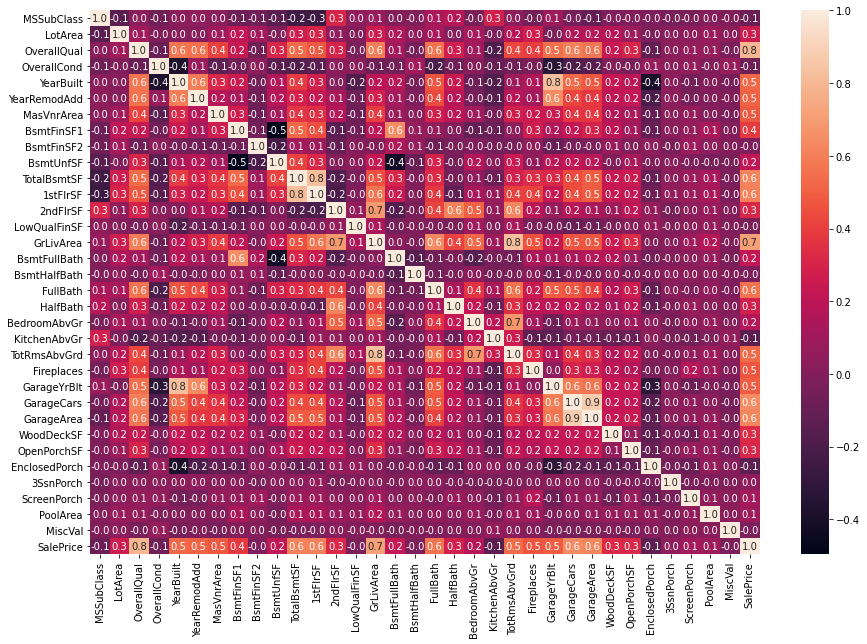

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(houses_v2.corr(),annot=True,fmt='.1f')

In [18]:
# Variables como OverallQual y GrLivArea se encuentran fuertemente correlacionadas. Teniendo sus definiciones:

# 1. OverallQual: calidad general del material y del acabado
# 2. GrLivArea: superficie habitable por encima del nivel del suelo en pies cuadrados

# Tengiendo en cuenta que tanto la calidad de los materiales de una casa como el área construida pueden ser variables
# relevantes que incidan en el precio final, no eliminaré dichas características

2. Tratamiento de valores faltantes: en la figura 4 se muestran las variables que contienen valores faltantes. ¿Cuál sería la mejor manera de llenar esos valores faltantes en cada una de las columnas?

In [20]:
y = houses_v2['SalePrice']
X = houses_v2.drop('SalePrice',axis=1) # Eliminar SalePrice para poder usarlo en la regresión y clasificación

# Primero se imputará y luego los valores de las etiquetas se convertirán a númericos 
# para poder usarlos en la regresión

modelo = LabelEncoder()

# variables categóricas
columnas = X.select_dtypes(include='object').columns
for item in columnas:
    # Imputar valores faltantes con los datos de las modas
    moda = X[item].mode()[0]
    X[item] = X[item].fillna(moda)
    
    # discretizar
    X[item] = modelo.fit_transform(X[item])

# Variables numéricas
columnas = X.select_dtypes(exclude='object').columns
for item in columnas:
    # Imputar valores faltantes con los datos de las medianas
    mediana = X[item].median()
    X[item] = X[item].fillna(mediana)

X.head(3)

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition
0,60,3,8450,3,3,4,0,5,2,2,...,2,0,61,0,0,0,0,0,8,4
1,20,3,9600,3,3,2,0,24,1,2,...,2,298,0,0,0,0,0,0,8,4
2,60,3,11250,0,3,4,0,5,2,2,...,2,0,42,0,0,0,0,0,8,4


3. Problema de regresión
   - a)	Al aplicar árboles de decisión sobre el conjunto de datos el resultado de la raíz cuadrada del error cuadrático medio (RMSE) sobre el conjunto de test es de: 41002.2. Y el resultado del RMSE después de podar el árbol es de: 42927.25. ¿Qué conclusiones podríamos obtener de estos resultados?

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1)

In [23]:
arboles_1 = DecisionTreeRegressor() # sin podar
arboles_1.fit(X_train, y_train)
y_pred_1 = arboles_1.predict(X_test)

In [24]:
arboles_2 = DecisionTreeRegressor(max_depth=5) # profundidad limitada
arboles_2.fit(X_train, y_train)
y_pred_2 = arboles_2.predict(X_test)

In [25]:
print('RMSE del árbol sin podar: ',np.sqrt(mean_squared_error(y_test, y_pred_1)))
print('RMSE del árbol podado:',np.sqrt(mean_squared_error(y_test, y_pred_2)))

RMSE del árbol sin podar:  37103.97957303454
RMSE del árbol podado: 32713.791210939067


In [27]:
# El árbol podado tiene un error menor del árbol sin podar, lo cual nos indica 
# que este modelo presenta mejores valores

Regresión con bosques aleatorios

3b)	Al aplicar random forest sobre el conjunto de datos el resultado de la raíz del error cuadrático medio (RMSE) sobre el conjunto de test es de: 27588.9. ¿Qué conclusiones podríamos obtener de este resultado comparándolo con los de árboles de decisión? ¿Por qué los resultados son tan diferentes?

In [28]:
bosque_aleatorio = RandomForestRegressor()
modelo_ba1 = bosque_aleatorio.fit(X_train, y_train)
y_pred_3 = modelo_ba1.predict(X_test)

In [37]:
bosque_aleatorio = RandomForestRegressor(n_estimators=50, random_state=1) # cantidad de árboles limitados
model_ba2 = bosque_aleatorio.fit(X_train, y_train)
y_pred_4 = model_ba2.predict(X_test)

In [38]:
print('RMSE del random forest 1:',np.sqrt(mean_squared_error(y_test, y_pred_3)))
print('RMSE del random forest 2:',np.sqrt(mean_squared_error(y_test, y_pred_4)))

RMSE del random forest 1: 25533.108816214924
RMSE del random forest 2: 26451.551869517305


In [39]:
# Al ser un tipo de algoritmo de ensamble y sacar un promedio de los resultados de sus árboles
# arroja unos menores errores frente a los datos, con respecto a los árboles de decisión

4.	Problema de clasificación
    - a)	Para trabajar el problema de clasificación dividimos el precio del inmueble en 3 categorías:
        grupo1 SalePrice menor o igual a 100 000, 
        grupo2 SalePrice entre 101 000 y 500 000 y 
        grupo3 SalePrice mayor o igual a 501 000.
        Al aplicar árboles de decisión la matriz de confusión resultante sobre los datos de test es la siguiente:
        
        ¿Podrías calcular la exactitud sobre cada uno de los grupos? ¿Qué conclusiones podríamos sacar? ¿Alguna sugerencia sobre qué hacer con el grupo 3?
    - b)	Al aplicar random forest, la matriz de confusión resultante sobre los datos de test es la siguiente 
        
        ¿Podrías calcular la exactitud sobre cada uno de los grupos? ¿Qué conclusiones podríamos sacar? Compara los resultados con los obtenidos aplicando árboles de decisión.

In [40]:
grupos = [0,100000, 500000,10000000000]
nombres = ['grupo1','grupo2','grupo3']

y_nuevo = pd.cut(y, grupos, labels=nombres)

In [43]:
nuevo_df = pd.concat([y, y_nuevo],axis=1)
nuevo_df.columns = ['y','y_nuevo']

nuevo_df['y_nuevo'].value_counts(normalize=True)

grupo2    0.909589
grupo1    0.084247
grupo3    0.006164
Name: y_nuevo, dtype: float64

In [46]:
# Parece que el 90% de los datos se encuentran en el grupo 2.
# Los grupos deberían ser decididos de forma que cada uno tengo valores más representativos, por ejemplo,
# que cada uno tenga el 33% de los datos

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y_nuevo, test_size=0.25, random_state=1)

In [51]:
modelo_1 = DecisionTreeClassifier(random_state=1)
modelo_1.fit(X_train, y_train)
y_pred_1 = modelo_1.predict(X_test)

In [52]:
print(confusion_matrix(y_test, y_pred_1))
print(classification_report(y_test, y_pred_1))

[[ 18  18   0]
 [ 17 307   3]
 [  0   0   2]]
              precision    recall  f1-score   support

      grupo1       0.51      0.50      0.51        36
      grupo2       0.94      0.94      0.94       327
      grupo3       0.40      1.00      0.57         2

    accuracy                           0.90       365
   macro avg       0.62      0.81      0.67       365
weighted avg       0.90      0.90      0.90       365



In [ ]:
# No hay suficientes datos para entrenar el grupo 3, según lo que nos muestra la métrica support
# Está desbalanceado

In [53]:
modelo_2 = RandomForestClassifier(random_state=1)
modelo_2.fit(X_train, y_train)
y_pred_2 = modelo_2.predict(X_test)

In [54]:
print(confusion_matrix(y_test, y_pred_2))
print(classification_report(y_test, y_pred_2))

[[ 18  18   0]
 [  3 324   0]
 [  0   1   1]]
              precision    recall  f1-score   support

      grupo1       0.86      0.50      0.63        36
      grupo2       0.94      0.99      0.97       327
      grupo3       1.00      0.50      0.67         2

    accuracy                           0.94       365
   macro avg       0.93      0.66      0.76       365
weighted avg       0.94      0.94      0.93       365



In [ ]:
# El grupo 3 tiene muy poca frecuencia, segun el valor que nos muestra support.
# También deben balancearse los datos

# Tanto en los árboles como en random forest, el grupo 2 presenta un mejor f1-score frente a los otros 2 grupos

5. Comentarios adicionales

In [58]:
# Random Forest presentan mejores resultados frente a los datos que los árboles de decisión
# Para los grupos de clasificación, se deben balancear porque no había suficientes datos para entrenar al grupo 1 y 2
# Se pudo eliminar más características usando la función VarianceThreshold de sklearn